In [112]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [113]:
finance = pd.read_csv(r"C:\Users\frank\Desktop\Shakes\FinanceData.csv")

In [229]:
finance.head(3)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS (Cost of Goods sold),Profit,Date,Month Number,Month Name,Year,New Discounts
0,Government,Canada,Carretera,None,1618.5,$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",1/1/2014,1,January,2014,"$32,370.00 $32,370.00"
1,Government,Germany,Carretera,None,1321.0,$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",1/1/2014,1,January,2014,"$26,420.00 $26,420.00"
2,Midmarket,France,Carretera,None,2178.0,$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",6/1/2014,6,June,2014,"$32,670.00 $32,670.00"


In [119]:
### Checking for null values
nan_df = finance[finance.isna().any(axis=1)]
##nan_df.head()

In [19]:
### Checking for duplicates values
duplicates = df[df.duplicated(subset=['Segment'], keep=False)]

if not duplicates.empty:
    print("Duplicate rows:")
    print(duplicates)
else:
    print("No duplicates found")

In [38]:
df = pd.DataFrame(finance)

# Print the schema using .info()
##df.info()

In [84]:
print(df.columns)

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       '  Sales ', 'COGS (Cost of Goods sold)', 'Profit', 'Date',
       'Month Number', 'Month Name', 'Year'],
      dtype='object')


In [12]:
name_column = df['Month Number']
name_column.head(5)

0    1
1    1
2    6
3    6
4    6
Name: Month Number, dtype: int64

In [146]:
#Display column datatype
df.dtypes

Segment                       object
Country                       object
Product                       object
Discount Band                 object
Units Sold                   float64
Manufacturing Price           object
Sale Price                    object
Gross Sales                   object
Discounts                     object
  Sales                       object
COGS (Cost of Goods sold)     object
Profit                        object
Date                          object
Month Number                   int64
Month Name                    object
Year                           int64
dtype: object

In [122]:
v1 = lambda x:float(x[1:-1])

In [125]:
##df.Profit=df.Profit.apply(v1)

In [141]:
df.Date.dtypes

dtype('O')

In [137]:
## Remove space before Column names
df.rename(columns={'Sales':'Sales'}, inplace=True)

In [151]:
##data_= finance.replace('[{^\d.}]', '', regex=True).astype(float)

## 1. Identify the month where most Units were sold?

In [170]:
results = finance.groupby('Month Number').sum(numeric_only=True).head(12)
## October was the month where more Units were sold: (201104 Units sold) 

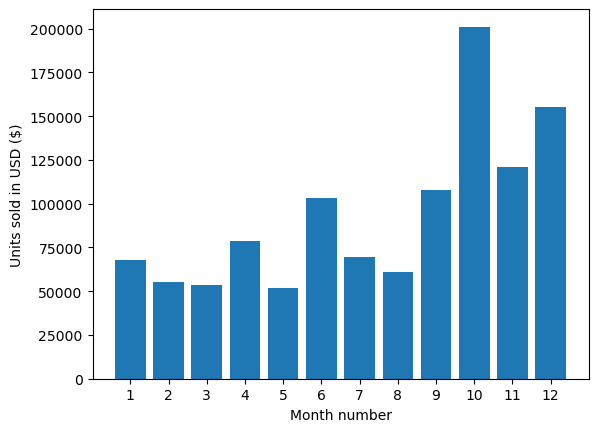

In [168]:
import matplotlib.pyplot as plt
months = range(1,13)

plt.bar(months, results['Units Sold'])
plt.xticks(months)
plt.ylabel('Units sold in USD ($)')
plt.xlabel('Month number')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### 2. Which country generated more Profit?

In [180]:
finance.groupby('Country').sum(numeric_only=True).head(12)
## Canada is the country with most Units sold which generated more profit

,Units Sold,Month Number,Year
Country,,,
Canada,247428.5,1106,281925
France,240931.0,1106,281925
Germany,201494.0,1106,281925
Mexico,203325.0,1106,281925
United States of America,232627.5,1106,281925


In [193]:
#import matplotlib.pyplot as plt

#Countries = [Country for Country, df in finance.groupby('Country')]

#plt.bar(Countries, results['Units Sold'])
#plt.xticks(Countries, rotation='horizontal', size=8)
#plt.ylabel('Sales in USD ($)')
#plt.xlabel('City name')
#plt.ticklabel_format(style='plain', axis='y')
#plt.show()

## 3. Which Products had the highest sales and lowest sales?

In [198]:
finance.groupby(' Product ').sum(numeric_only=True).head()
## Paseo is the most sold Product and Carretera had the lowest sales

,Units Sold,Month Number,Year
Product,,,
Amarilla,155315.0,738,189293
Carretera,146846.0,737,187279
Montana,154198.0,721,187279
Paseo,338239.5,1603,406777
VTT,168783.0,872,219498


## 4. Calculate the discounts for Null cells

In [ ]:
#all_data['Price Each']

Add New Discount Column

In [231]:
finance['New Discounts'] = finance[' Gross Sales '] * 2
finance.head(5)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS (Cost of Goods sold),Profit,Date,Month Number,Month Name,Year,New Discounts
0,Government,Canada,Carretera,None,1618.5,$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",1/1/2014,1,January,2014,"$32,370.00 $32,370.00"
1,Government,Germany,Carretera,None,1321.0,$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",1/1/2014,1,January,2014,"$26,420.00 $26,420.00"
2,Midmarket,France,Carretera,None,2178.0,$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",6/1/2014,6,June,2014,"$32,670.00 $32,670.00"
3,Midmarket,Germany,Carretera,None,888.0,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",6/1/2014,6,June,2014,"$13,320.00 $13,320.00"
4,Midmarket,Mexico,Carretera,None,2470.0,$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",6/1/2014,6,June,2014,"$37,050.00 $37,050.00"


In [233]:
finance.groupby('Segment').sum(numeric_only=True).head()

,Units Sold,Month Number,Year
Segment,,,
Channel Partners,161263.5,790,201375
Enterprise,168552.0,790,201375
Government,470673.5,2370,604125
Midmarket,172178.0,790,201375
Small Business,153139.0,790,201375
